In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy

In [2]:
wave_file = 'jily.wav'
wvf = wave.open(wave_file)
wvf.rewind()
signal = wvf.readframes(-1)
signal = np.frombuffer(signal, np.int16)
fs = wvf.getframerate()
n = wvf.getnchannels()

In [3]:
channels=np.reshape(signal, (int(len(signal)/n),n), order="A")
Time=np.linspace(0, len(signal)/n/fs, num=int(len(signal)/n))

In [4]:
channel = channels[:,1]

In [48]:
np.arange?

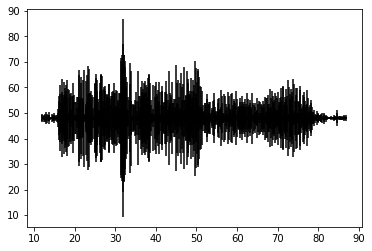

In [12]:
x_offset=12
y_offset=96/2

max_x = 75
max_y = 80
scale_x = max_x/Time[-1]
scale_y = (max_y/2)/np.max(np.abs(channel))

plot_lines_x = np.arange(0, max_x, 0.1)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channel*scale_y)
for idx, line in enumerate(np.abs(plot_lines_y)):
    plt.vlines(x_offset+plot_lines_x[idx], -line+y_offset, line+y_offset)

In [6]:
import gcode

In [10]:
prog = gcode.GCode()
prog.G90()
prog.G21()
prog.G92(X=0, Y=0, Z=0)
for X, Y in zip(plot_lines_x, np.abs(plot_lines_y)):
    prog.G0(X=X+x_offset, Y=-Y+y_offset, F=300)
    prog.M3(S=255)
    prog.G1(X=X+x_offset, Y=-Y+y_offset, F=150)
    prog.G1(X=X+x_offset, Y=Y+y_offset, F=150)
    prog.M5()

prog.save("jily.ngc")